# `origin` in `matplotlib.pyplot.imshow`

When we initially discussed `matplotlib.pyplot.imshow` in lecture, the density plots we created with it were shown upside down (and with incorrect y axis markers).  This happened because the way we used `np.meshgrid` put the smallest y values in the first row of the resulting matrix, and `imshow` defaults to putting the first row at the top of the image.  The usual mathematical convention is to put the smallest y values at the bottom, and we labeled the axes as if that were true.

The course notebooks have been corrected.  This notebook discusses the issue so you can see what happened and how to fix it.

First, let's make a density plot for this function
$$ f(x,y) = \begin{cases} x & \text{if y<4}\\ x+1 & \text{else} \end{cases}$$
on the square $0 \leq x \leq 5$, $0 \leq y \leq 5$.  We use `meshgrid` to create a grid of sample points, apply the function to that grid, and then pass `extent` to `imshow` to set the axes.  We expect to see a stripe across the top fifth of the figure, where $y \geq 4$.

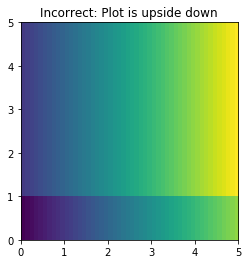

In [4]:
import numpy as np
import matplotlib.pyplot as plt

xx,yy = np.meshgrid(np.linspace(0,5,50),np.linspace(0,5,50))
zz = xx + (yy<4).astype("float")

plt.title("Incorrect: Plot is upside down")
plt.imshow(zz,extent=(0,5,0,5))

As you can see, y=4 is near the bottom of the figure!  The y axis labels are wrong.

To fix this, we need to tell `imshow` that the first row of data corresponds to the lower side of the figure we're drawing.  We do that by passing `origin="lower"` as a kwarg.

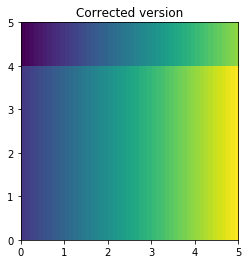

In [6]:
import numpy as np
import matplotlib.pyplot as plt

xx,yy = np.meshgrid(np.linspace(0,5,50),np.linspace(0,5,50))
zz = xx + (yy<4).astype("float")

plt.title("Corrected version")
plt.imshow(zz,extent=(0,5,0,5),origin="lower")

**That's it.  When making density plots using `meshgrid` and `imshow`, just remember to pass `origin="lower"`.**

This advice is for density plots of functions.  There *are* some situations where you might use `imshow` and expect the top row of data to appear at the top of the image.  For example, if you have a large matrix and want to see how big its entries are, `imshow` can do that, and the default options will put the first row of the matrix at the top (matching the way people usually write matrices).  E.g.

(-0.5, 4.5, 3.5, -0.5)

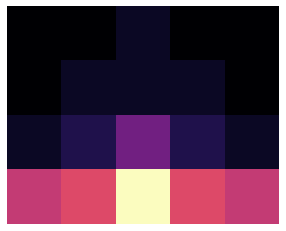

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Matrix with biggest entry in bottom row
M = np.array( [
    [0,0,1,0,0],
    [0,1,1,1,0],
    [1,2,5,2,1],
    [8,9,15,9,8]
])

# Image with brightest pixel at the bottom
plt.imshow(M, cmap="magma")
plt.axis('off') # no axes or ticks

A much more detailed discussion of this issue can be found in the matplotlib docs at:
* [https://matplotlib.org/stable/tutorials/intermediate/imshow_extent.html](https://matplotlib.org/stable/tutorials/intermediate/imshow_extent.html)
